**Task 10: Correlation Analysis**

Objective: Explore potential correlations
between factors.

Steps:
1. Select Relevant Columns: Identify columns
such as age, investment duration, and
expected returns for correlation analysis.

2. Use Statistical Methods or Visualizations:
Employ statistical methods (e.g., correlation
coefficients) or visualizations (e.g., scatter
plots) to explore and visualize potential
correlations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data_set.csv")

In [3]:
# Display top 5 rows
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [4]:
# Select age, duration, and expected returns
correlation_df = df[['age', 'Duration', 'Expect']]
correlation_df.head()

,age,Duration,Expect
0,34,1-3 years,20%-30%
1,23,More than 5 years,20%-30%
2,30,3-5 years,20%-30%
3,22,Less than 1 year,10%-20%
4,24,Less than 1 year,20%-30%


In [5]:
# Calculate correlation coefficients
correlation_matrix = correlation_df
print(correlation_matrix)

    age           Duration   Expect
0    34          1-3 years  20%-30%
1    23  More than 5 years  20%-30%
2    30          3-5 years  20%-30%
3    22   Less than 1 year  10%-20%
4    24   Less than 1 year  20%-30%
5    24          1-3 years  30%-40%
6    27          3-5 years  20%-30%
7    21          3-5 years  20%-30%
8    35          1-3 years  20%-30%
9    31          3-5 years  30%-40%
10   35          3-5 years  20%-30%
11   29          1-3 years  20%-30%
12   21          1-3 years  20%-30%
13   28          1-3 years  20%-30%
14   25          1-3 years  20%-30%
15   27          1-3 years  20%-30%
16   28          1-3 years  20%-30%
17   27          1-3 years  20%-30%
18   29          1-3 years  20%-30%
19   26          3-5 years  20%-30%
20   29          3-5 years  20%-30%
21   24          3-5 years  20%-30%
22   27          3-5 years  20%-30%
23   25          3-5 years  20%-30%
24   26          3-5 years  30%-40%
25   32          3-5 years  20%-30%
26   26          3-5 years  

In [6]:
# Select only the columns we need
df = df[['age', 'Duration', 'Expect']]

In [7]:
# Convert 'Duration' to numeric values
duration_map = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 7
}
df['Duration'] = df['Duration'].map(duration_map)

In [8]:
# Convert 'Expect' to numeric values (using the midpoint of the range)
expect_map = {
    '10%-20%': 15,
    '20%-30%': 25,
    '30%-40%': 35
}
df['Expect'] = df['Expect'].map(expect_map)

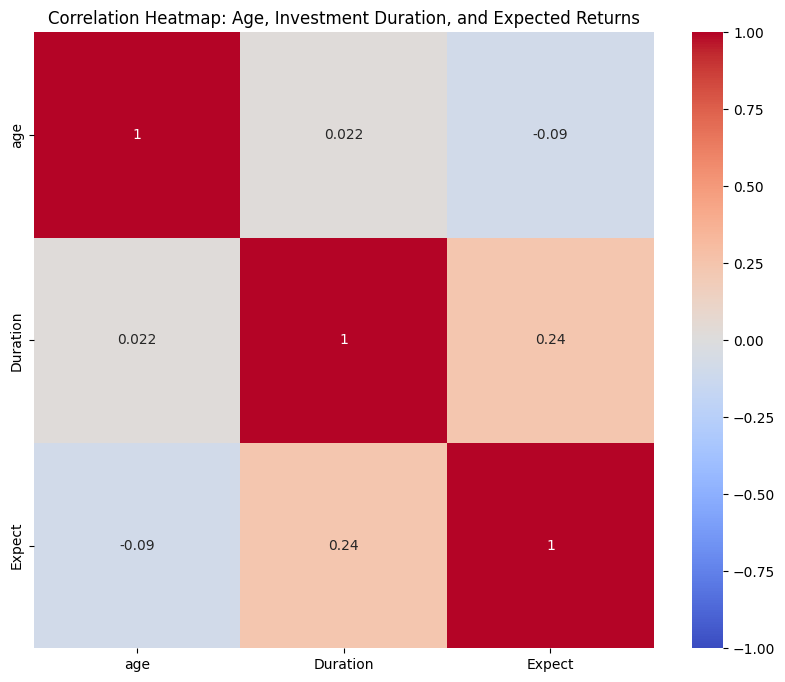

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Age, Investment Duration, and Expected Returns')
plt.show()

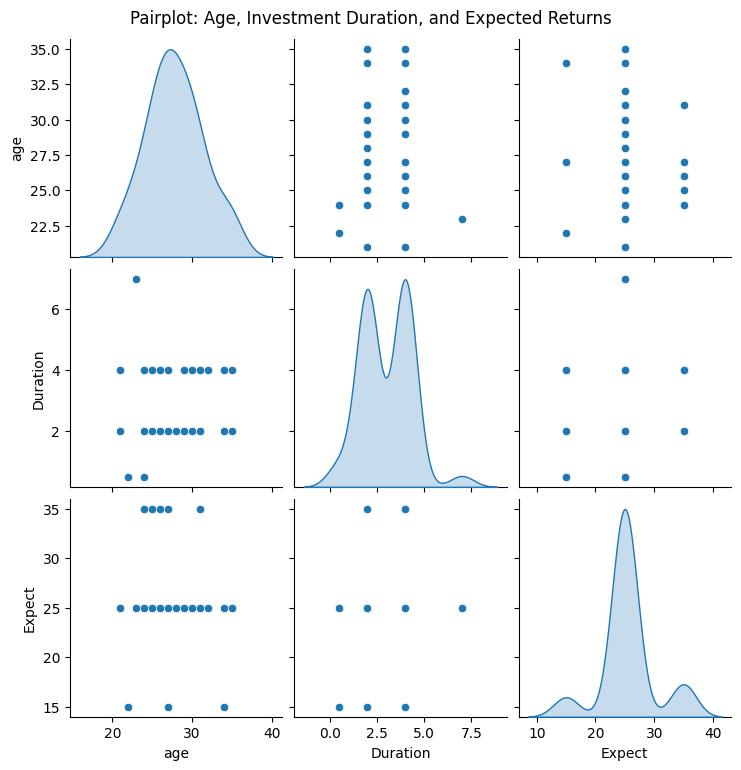

In [10]:
# Create a pairplot to visualize relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot: Age, Investment Duration, and Expected Returns', y=1.02)
plt.show()

In [11]:
# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               age  Duration    Expect
age       1.000000  0.022228 -0.089606
Duration  0.022228  1.000000  0.241785
Expect   -0.089606  0.241785  1.000000


In [12]:
# Additional analysis: Calculate summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             age  Duration     Expect
count  40.000000  40.00000  40.000000
mean   27.800000   3.00000  25.500000
std     3.560467   1.29595   4.500712
min    21.000000   0.50000  15.000000
25%    25.750000   2.00000  25.000000
50%    27.000000   3.00000  25.000000
75%    30.000000   4.00000  25.000000
max    35.000000   7.00000  35.000000


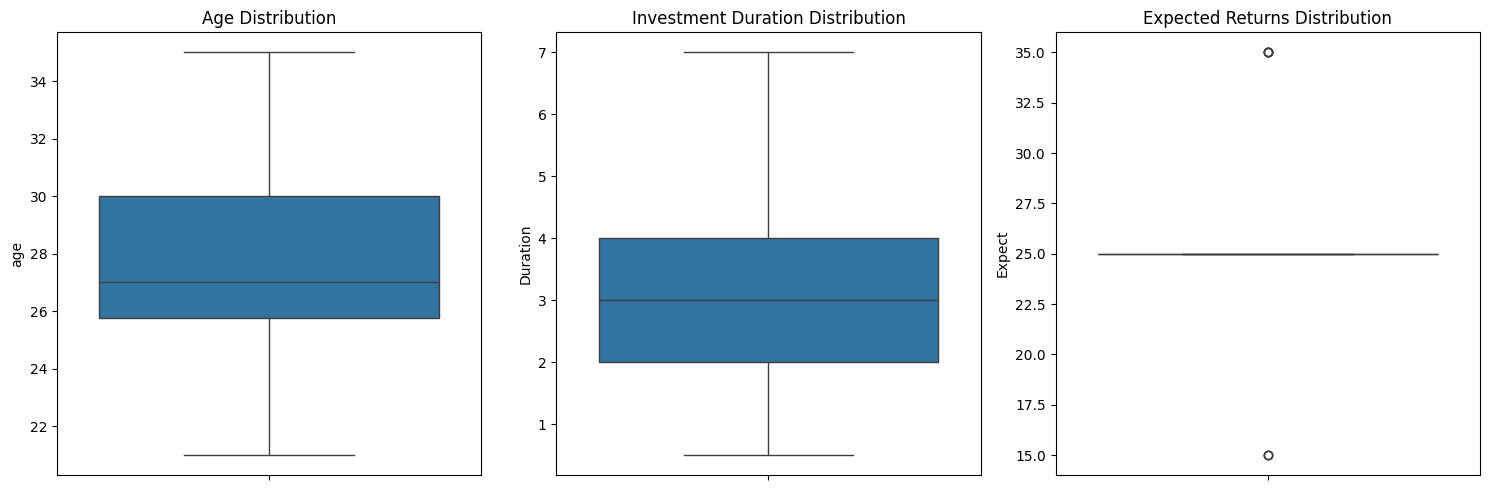

In [13]:
# Create box plots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='age', ax=axes[0])
sns.boxplot(data=df, y='Duration', ax=axes[1])
sns.boxplot(data=df, y='Expect', ax=axes[2])
axes[0].set_title('Age Distribution')
axes[1].set_title('Investment Duration Distribution')
axes[2].set_title('Expected Returns Distribution')
plt.tight_layout()
plt.show()

Based on the scatter plot matrix and the data analysis, here are the key observations about potential correlations:

1. Age vs. Investment Duration:
* There doesn't appear to be a strong correlation between age and investment duration.
* Investors of various ages seem to choose different investment durations, with no clear pattern emerging.


2. Age vs. Expected Returns:
* There's no clear correlation between age and expected returns.
Most investors, regardless of age, expect returns in the 20%-30% range.
* A few outliers across different age groups expect higher (30%-40%) or lower (10%-20%) returns.


3. Investment Duration vs. Expected Returns:
* There's no strong correlation between investment duration and expected returns.
* Investors with different investment durations seem to have similar return expectations, mostly in the 20%-30% range.


4. Distribution of Data Points:
* There's a high concentration of data points around the 20%-30% expected returns range across all ages and investment durations.
* The investment durations are mostly clustered around 2-4 years, with fewer data points for very short (< 1 year) or very long (> 5 years) durations.


5. Outliers:
* A few outliers exist, particularly in expected returns, with some investors expecting higher or lower returns compared to the majority.


Conclusions:

* Lack of Strong Correlations: The data doesn't show strong correlations between age, investment duration, and expected returns. This suggests that these factors may be influenced by other variables not captured in this analysis (e.g., risk tolerance, financial goals, market conditions).
* Consistency in Expectations: Regardless of age or investment duration, most investors have similar return expectations (20%-30%). This could indicate a common perception of market performance or a shared source of financial advice among the participants.
* Diverse Investment Horizons: The spread of investment durations across different ages suggests that investment horizon might be more influenced by individual financial goals rather than age.
* Optimistic Return Expectations: The prevalence of 20%-30% return expectations across all age groups and investment durations suggests a generally optimistic outlook among investors, which might not always align with realistic market performance.

To further this analysis, we might consider:

* Investigating other factors that could influence these variables (e.g., risk tolerance, financial literacy)
* Conducting a more detailed statistical analysis to quantify the relationships between these variables
* Exploring how these expectations align with historical market performance for various investment types